In [1]:
import os
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from IPython.display import HTML

In [2]:
DATA_PATH = '../data'

TDCX_COLORS = ['#EB1D24', '#FAA41E']
TDCX_CMAP = mpl.colors.LinearSegmentedColormap.from_list("", TDCX_COLORS)
sns.set_palette(sns.color_palette(TDCX_COLORS))

# UOT

## Data Audit

In [3]:
UOT_PATH = os.path.join(DATA_PATH, 'UOT')
files_list = os.listdir(UOT_PATH)
print(f'There are {len(files_list)} files in UOT')

There are 5 files in UOT


In [4]:
df = {}
for file in tqdm(files_list):
    df[file] = pd.read_csv(os.path.join(UOT_PATH, file))

100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:01<00:00,  3.89it/s]


In [5]:
features = []
ref = []
diff = {}
for key, value in df.items():
    if not ref:
        ref = set(value.columns)
    else:
        diff = ref.symmetric_difference(set(value.columns))
    
    if diff:
        raise('Columns are different')
    
print(f'List of features: {ref}')
print(f'Number of features: {len(ref)}')

List of features: {'status_map', 'time_in_billable_statuses_sec', 'num_transfer_out', 'employee_type', 'Vertical ID', 'Business Unit', 'time_job_assigned_not_reviewing_sec', 'time_in_all_statuses_sec', 'Date', 'Region', 'time_job_assigned_in_available_status_sec', 'Throughput', 'Staffing Type', 'reporting_ds', 'work_location_status', 'RepID', 'snapshot_ds', 'Work City', 'time_in_available_status_sec', 'time_excluding_unavailable_meal_statuses_sec', 'time_in_productive_statuses_sec', 'Occupancy', 'Number of Records', 'Organisation', 'Utilization', 'num_decisions_transfers_in_available_status', 'WFM User Group Name', 'Staffing Market', 'Vertical Name', 'time_job_not_assigned_not_reviewing_sec', 'num_decision', 'time_in_available_or_non_srt_prod_sec', 'time_job_not_assigned_reviewing_sec', 'actor_name', 'num_skip', 'time_job_assigned_reviewing_sec', 'Utilization_old'}
Number of features: 37


There are consistent features across files.

In [6]:
df_uot = pd.DataFrame()
for key, value in df.items():
    df_uot = pd.concat([df_uot, value])

In [7]:
null_percentage = pd.DataFrame(
    (100 * df_uot.isna().sum() / df_uot.shape[0]).sort_values(ascending=False),
     columns=['Percentage'])

display(null_percentage)
num_null = len(null_percentage[null_percentage.Percentage != 0])
print(f'Number of features with null values: {num_null}')

Percentage
WFM User Group Name                           100.000000
Throughput                                     35.963610
Occupancy                                      31.504603
num_decision                                   25.049942
num_transfer_out                               25.049942
num_skip                                       25.049942
Utilization                                    14.102529
Utilization_old                                12.939692
num_decisions_transfers_in_available_status     1.106147
Staffing Market                                 0.107308
Date                                            0.000000
time_excluding_unavailable_meal_statuses_sec    0.000000
Organisation                                    0.000000
time_job_not_assigned_reviewing_sec             0.000000
time_job_not_assigned_not_reviewing_sec         0.000000
time_job_assigned_reviewing_sec                 0.000000
time_job_assigned_not_reviewing_sec             0.000000
time_job_assigned_in_available_status_sec       0.000000
time_in_productive_statuses_sec                 0.000000
time_in_billable_statuses_sec                   0.000000
time_in_available_status_sec                    0.000000
time_in_available_or_non_srt_prod_sec           0.000000
time_in_all_statuses_sec                        0.000000
Region                                          0.000000
employee_type                                   0.000000
Work City                                       0.000000
Number of Records                               0.000000
Staffing Type                                   0.000000
Business Unit                                   0.000000
actor_name                                      0.000000
work_location_status                            0.000000
Vertical ID                                     0.000000
status_map                                      0.000000
snapshot_ds                                     0.000000
reporting_ds                                    0.000000
RepID                                           0.000000
Vertical Name                                   0.000000

Number of features with null values: 10


In [8]:
dup = df_uot.shape[0] - df_uot.drop_duplicates().shape[0]
print(f'There are {dup} duplicate rows')

There are 0 duplicate rows


## Univariate Analysis

In [9]:
dtypes = df_uot.dtypes
num_cols = dtypes[~dtypes.isin(['object', 'datetime64[ns]'])]
num_cols = num_cols[num_cols != 'bool'].index.tolist()

In [10]:
num_cols

['Vertical Name',
 'Business Unit',
 'WFM User Group Name',
 'Organisation',
 'Region',
 'Work City',
 'Staffing Market',
 'Staffing Type',
 'actor_name',
 'Date',
 'employee_type',
 'RepID',
 'reporting_ds',
 'snapshot_ds',
 'status_map',
 'Vertical ID',
 'work_location_status',
 'num_decision',
 'num_decisions_transfers_in_available_status',
 'num_skip',
 'num_transfer_out',
 'Number of Records',
 'Occupancy',
 'Throughput',
 'time_excluding_unavailable_meal_statuses_sec',
 'time_in_all_statuses_sec',
 'time_in_available_or_non_srt_prod_sec',
 'time_in_available_status_sec',
 'time_in_billable_statuses_sec',
 'time_in_productive_statuses_sec',
 'time_job_assigned_in_available_status_sec',
 'time_job_assigned_not_reviewing_sec',
 'time_job_assigned_reviewing_sec',
 'time_job_not_assigned_not_reviewing_sec',
 'time_job_not_assigned_reviewing_sec',
 'Utilization',
 'Utilization_old']

C:\Users\jmbatula\AppData\Local\Temp\ipykernel_26608\2636275577.py:10: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  fig.tight_layout()


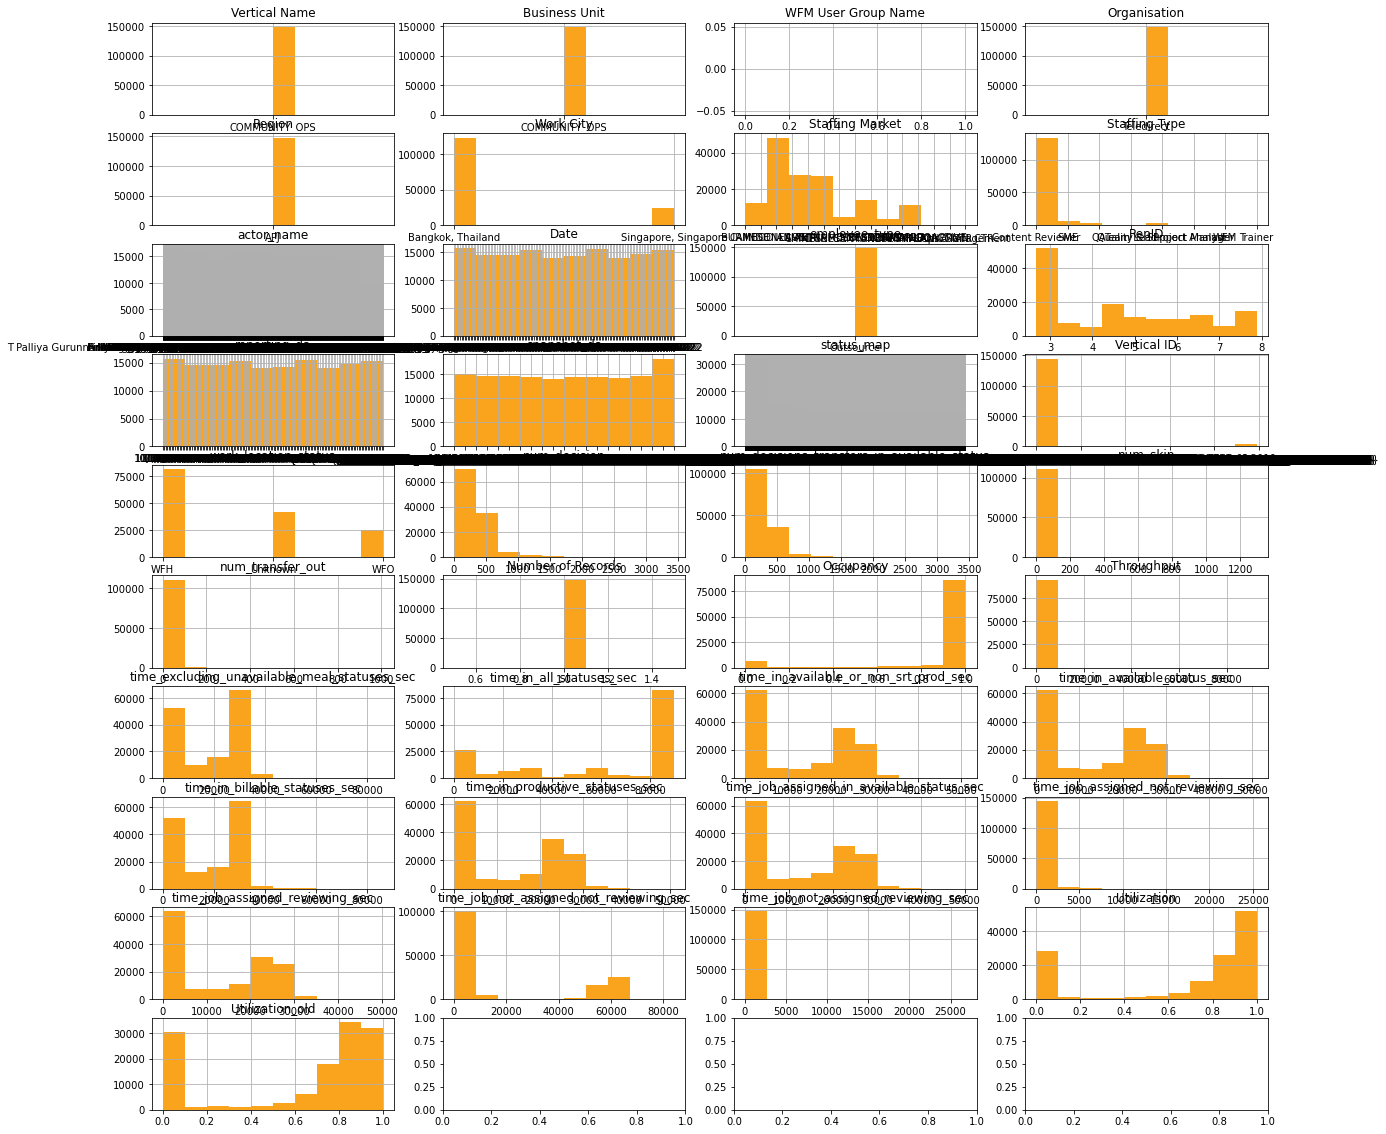

In [11]:
display(HTML('<center><b>Numerical Features</b></center>'))

fig, ax = plt.subplots(10, 4, figsize=(20, 20))
ax = ax.flatten()

for idx, num_col in enumerate(num_cols):
    df_uot[num_col].hist(ax = ax[idx], color = TDCX_COLORS[1])
    ax[idx].set_title(num_col)

fig.tight_layout()

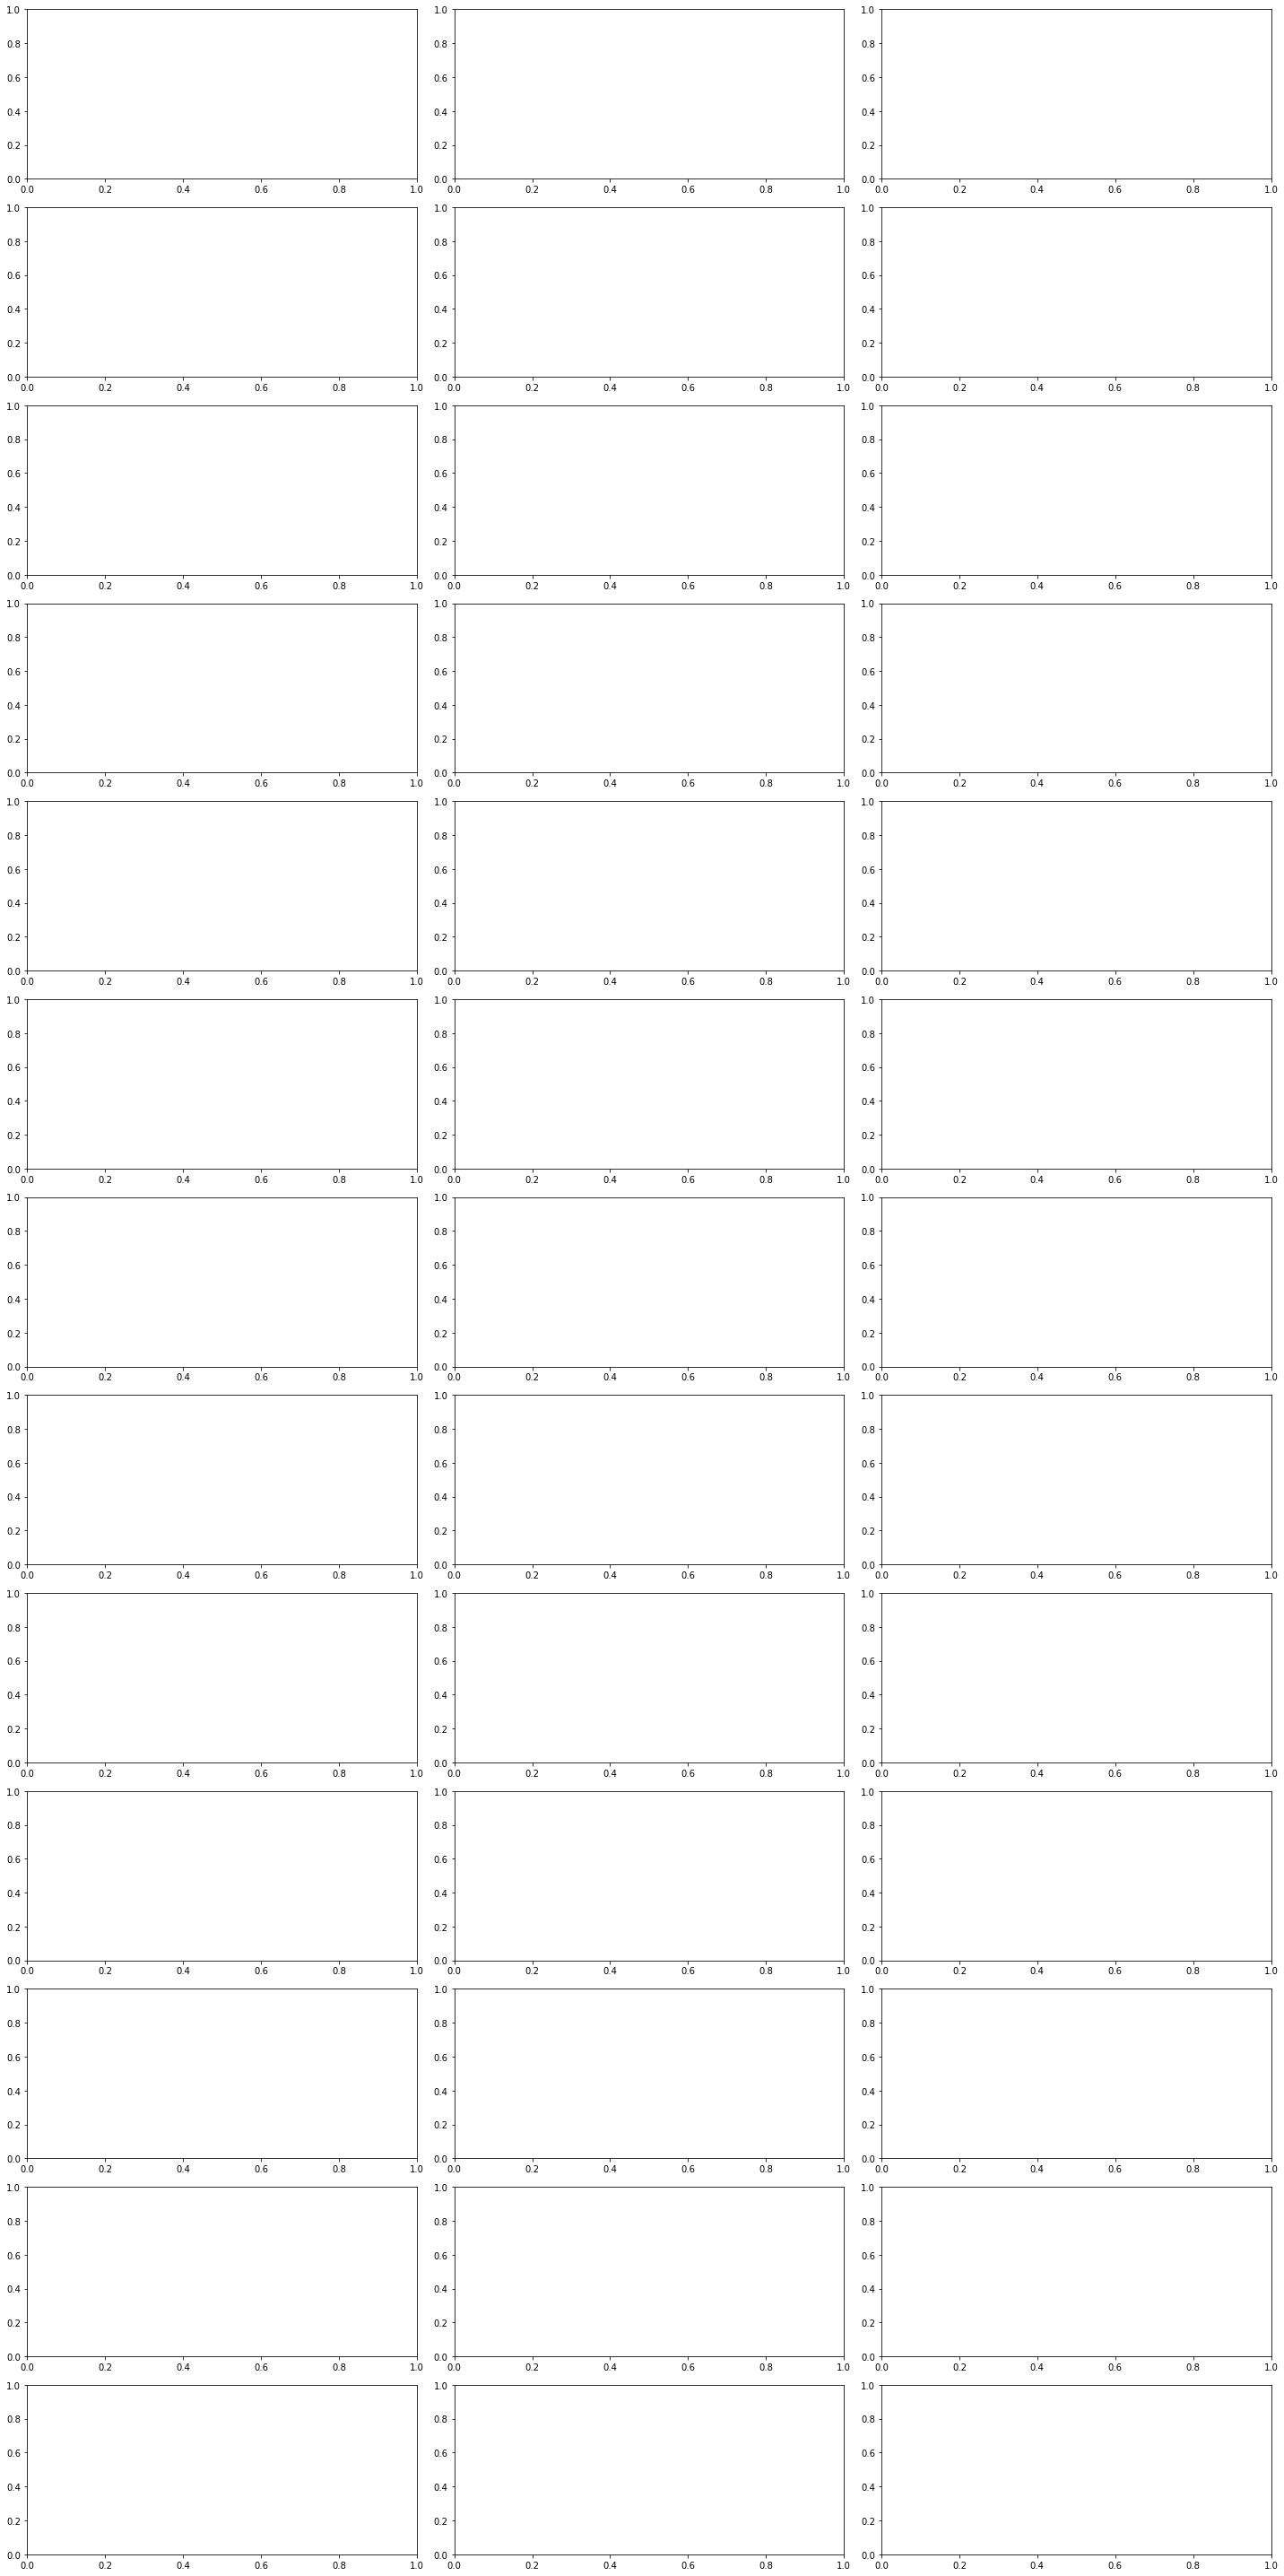

In [12]:
display(HTML('<center><b>Categorical Features</b></center>'))

dtypes = df_uot.dtypes
cat_cols = dtypes[dtypes.isin(['object'])].index.tolist()
cat_cols

fig, ax = plt.subplots(13, 3, figsize=(20, 40))
ax = ax.flatten()

for idx, cat_col in enumerate(cat_cols):
    df_uot[cat_col].value_counts()[:10][::-1].plot.barh(color=TDCX_COLORS[1],
                                                 ax=ax[idx])
    ax[idx].spines['top'].set_visible(False)
    ax[idx].spines['right'].set_visible(False)
    ax[idx].set_title(cat_col)

fig.tight_layout()

In [13]:
cat_cols

[]

## Trends

In [14]:
dtypes = df_uot.dtypes
date_cols = dtypes[dtypes.isin(['datetime64[ns]'])].index.tolist()

In [15]:
date_cols

[]

In [15]:
top_report_type = df_uot['Report Type'].value_counts()[:10].index.tolist()
df_report_trend = df_uot[df_uot['Report Type'].isin(top_report_type)]
df_report_trend = df_report_trend.groupby(
    ['week_end_date', 'Report Type']).size().reset_index()

print('Min date: ', df_report_trend['week_end_date'].min())
print('Max date: ', df_report_trend['week_end_date'].max())

KeyError: 'Report Type'

is there a trend per report types?